# Regression Methods

## Processing stock price data in Python

Financial signal processing studies the fluctuation of the value of assets based on historical data of either the same asset or other elements. For this coursework different techniques will be discussed and evaluated. The programming language used is Python 3, which comes with many statistical libraries that will be used for this experiment.

First, some modules will be loaded such as numpy, pandas and scipy. Then the data will be loaded from the file priceData.csv. Since it is labeled, the appropriate column is extracted. Due to the fact that there are indexes whose values are NaN, they are removed alongside their corresponding dates.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import datetime as dt
%matplotlib inline

# Read data from priceData.csv
px = pd.read_csv('priceData.csv')
spx = px['SPX Index']
dates = px['date']

# Remove NaN from the dataset and adjust the dates
spx_indices = np.where(px['SPX Index'].isna() == False)[0]
spx = spx[spx_indices]
dates = dates[spx_indices]

date_axis = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]

### Natural log plot

The following code uses matplotlib to display the log transformed SPX index from the year 1930 to 2017.

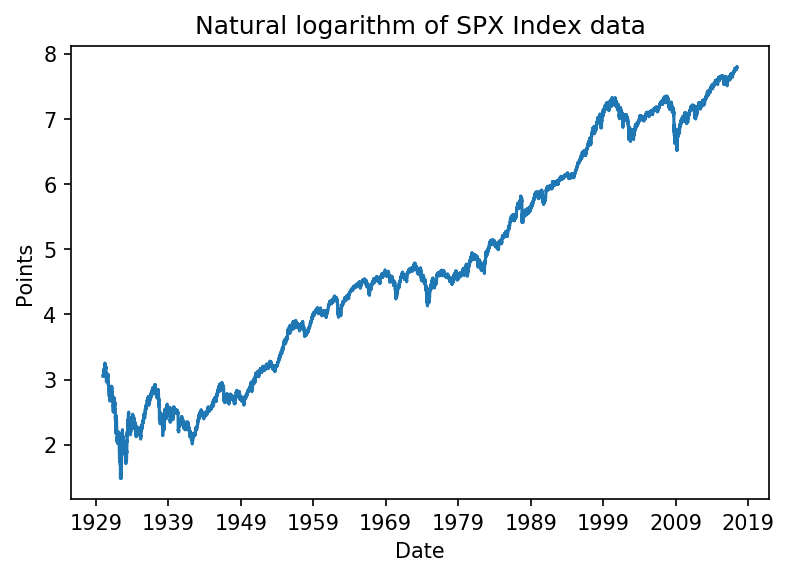

In [26]:
# Perform the natural logarithm transform of the data
logpx = np.log(spx)

plt.figure(dpi=150)
plt.plot(date_axis,logpx)
plt.title('Natural logarithm of SPX Index data')
plt.xlabel('Date')
plt.ylabel('Points')
plt.show()

### 252 Days sliding window

The evolution of the first and second order statistics (mean and variance) is computed and displayed. They are calculated using a sliding window of 252 days with a 1 day increment. Due to the exponential behaviour of the stock market, the price volatility increases with the increase in value. However, in terms of percentage it does not. A stock loosing $100 in value was more relevant in 1930 than in 2017 but a loss of 10\% of the value is equaly important. The simple price index captures the exponential behaviour of the trend but fails to provide a realistic view of what the variance is when analyzing the whole century.

On the other hand, the log transform gives a linear representation of the growth of the SPX index and it makes the analysis much easier. The log transform of the SPX Index variance turns it into a stationary times-series where it can be seen when the economic downturns occured.

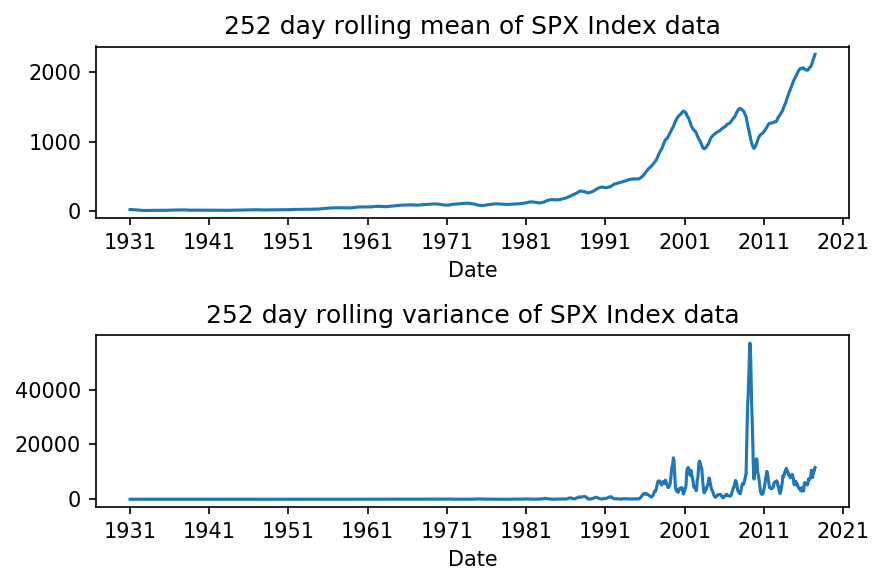

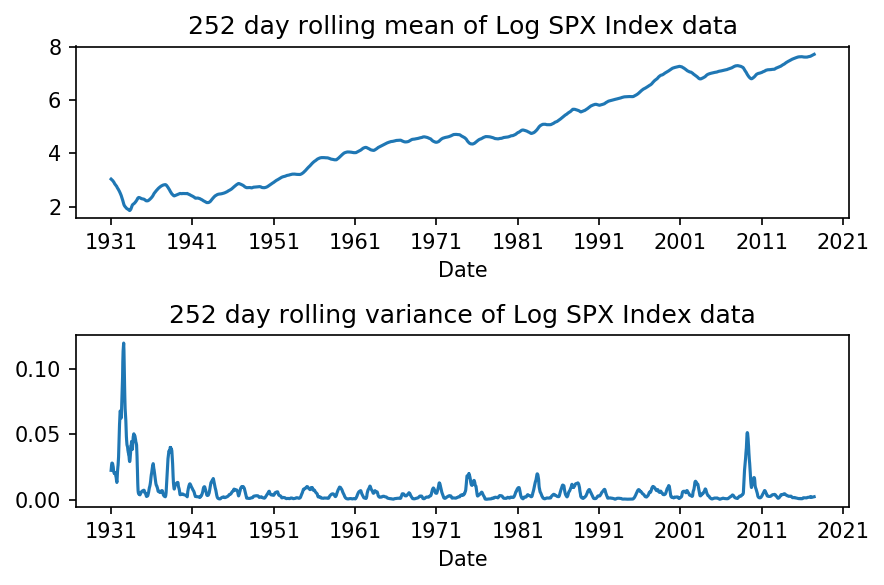

In [32]:
# Sliding mean
plt.figure(dpi=150)
plt.subplot(211)
plt.title('252 day rolling mean of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,spx.rolling(252).mean())

# Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,spx.rolling(252).var())
plt.title('252 day rolling variance of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Log Sliding mean
plt.figure(dpi=150)
plt.subplot(211)
plt.plot(date_axis,logpx.rolling(252).mean())
plt.title('252 day rolling mean of Log SPX Index data')
plt.xlabel('Date')

# Log Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,logpx.rolling(252).var())
plt.title('252 day rolling variance of Log SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


### Simple and Log return time-series

The return, sliding mean and variance of the return and the log return are displayed. As it can be observed in the figures, the advantage of employing the return instead of the real value of the index lies on the stationarity of the time series. The time series obtained from exercise 1.1.1 are nonstationary which is not desirable for the task of trend extraction. The log return and simple return variance are very similar due to the linear behaviour of the log function for very small values.


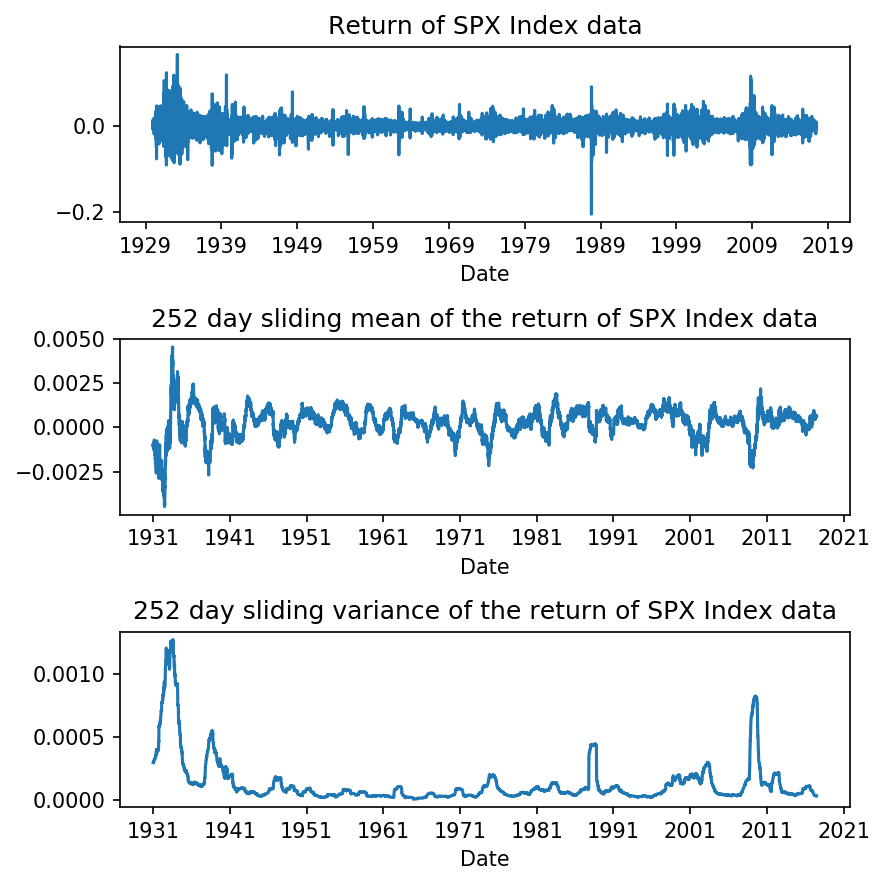

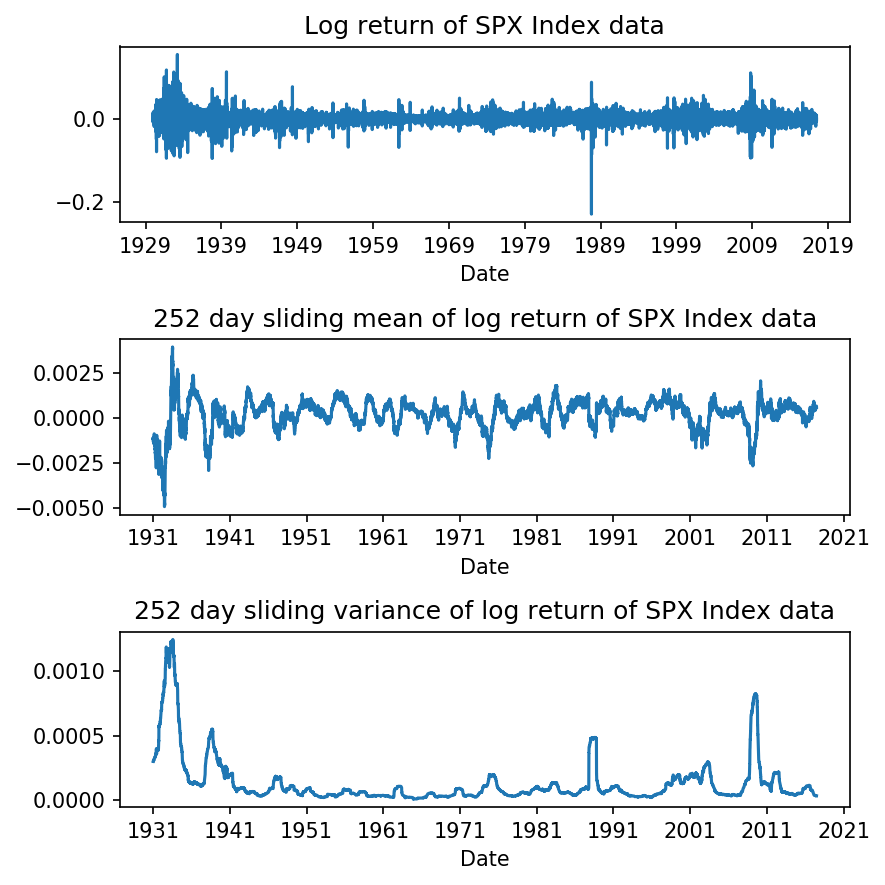

In [49]:

# Simple return
plt.figure(dpi=150, figsize=(6,6))
plt.subplot(311)
simpret = spx.pct_change()
plt.title('Return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret)
plt.tight_layout()

# Sliding mean simple return
plt.subplot(312)
simpret_roll_mean = spx.pct_change().rolling(252).mean()
plt.title('252 day sliding mean of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_mean)
plt.tight_layout()

# Sliding variance simple return
plt.subplot(313)
simpret_roll_var = spx.pct_change().rolling(252).var()
plt.title('252 day sliding variance of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_var)
plt.tight_layout()

# Log return
plt.figure(dpi=150, figsize=(6,6))
plt.subplot(311)
logret = logpx.diff()
plt.plot(date_axis,logret)
plt.title('Log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()

# Sliding mean Log return
plt.subplot(312)
logret_roll_mean = logpx.diff().rolling(252).mean()
plt.plot(date_axis,logret_roll_mean)
plt.title('252 day sliding mean of log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()

# Sliding var Log return
plt.subplot(313)
logret_roll_var = logpx.diff().rolling(252).var()
plt.plot(date_axis,logret_roll_var)
plt.title('252 day sliding variance of log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


### Jarque-Bera test

The Jarque-Bera test evaluates how well a gaussian model fits the time series being evaluated. It tests whether the kurtosis and skweness of the model is similar to that of a normal distribution. For its implementation, the scipy library is used. The p-value returned by the algorithm is 0. This means that the null hypothesis is rejected and the time-series do not follow a normal distribution i.e the market is not efficient.

In [54]:
# Return the Jarque-Bera test p-value for a time-series x
p_value = stats.jarque_bera(spx)[1]
print(p_value)

0.0


### Simple and logarithmic returns

The listing below illustrates the function that computes the simple and log returns. An asset's value whose value is £1, increases to £2 and then goes back down to £1 is evaluated. When using the simple return function, counter intuitively the purchaser of this asset does not have a return of 0 by the end of the day. However, in the case of the log return this is the case. For this reason the logarithmic return is preferred over the simple return.


In [64]:
price = [1, 2, 1]

# Simple return
R = np.zeros(3)
R[0] = 0            # There is no return on the first day
for t in range(1,3):
    R[t] = (price[t]-price[t-1])/price[t-1]
print('Simple return:', R)
print('Purchaser ends up with:' + str(sum(R)) + ' $')

# Log return
r = np.zeros(3)
r[0] = 0            # There is no return on the first day
for t in range(1,3):
    r[t] = np.log(price[t]/price[t-1])
print('Logarithmic return:', r)
print('Purchaser ends up with:' + str(sum(r)) + ' $')

Simple return: [ 0.   1.  -0.5]
Purchaser ends up with:0.5 $
Logarithmic return: [ 0.          0.69314718 -0.69314718]
Purchaser ends up with:0.0 $


### Preference of simple returns over log returns

Although log returns are easier to manipulate mathematically. There are some reasons because of which simple returns can be prefered over log returns. When the time frame of analysis is large, the assumption of log-normality of the distribution does not hold because the skewness of financial data is negative and that of the model is positive. Furthermore, the returns from different assets are not linearly additive contrary to simple returns.